## 크롤링 스터디 2주차(request, BeautifulSoup + Selenium 다운 및 코드 사용법)

  __지금까지 알고 있는 사실을 정리해보자면, ' 크롤링이란 데이터를 웹에서 긁어오는 행위이며, 데이터를 긁어오기 위해서는 HTML이란 형태를 분석할 줄 알아야 한다.' 까지가 정리된 사실이였고,__  
__오늘 할 내용은__   
1. 서버와 클라이언트의 관계
2. HTML을 어떻게 파이썬 코드로 구현하고, 그런 방식에는 무엇이 있는지(request + bs4 위주로)
3. 어떤 파서를 이용해서 코드를 짤 것인지.

__입니다__

## 01. 서버와 클라이언트의 관계

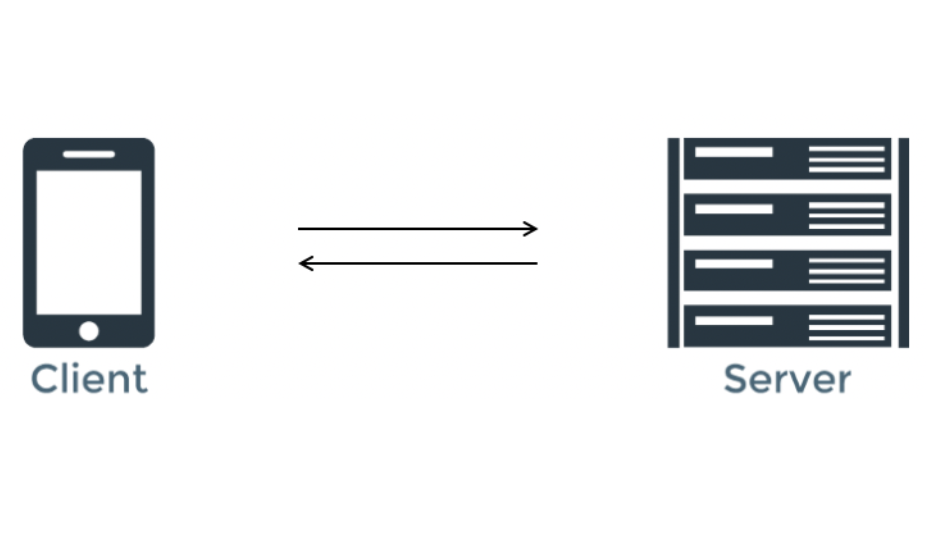

__클라이언트__ : 웹 브라우저 및 웹    
__서버__ : 클라이언트를 제외하고 보이지 않는 곳에서 클라이언트의 처리를 도와주는 곳

  우리는 스마트폰을 쓰며, 다양한 앱을 실행하고, 컴퓨터를 실행하면서 프로그램을 실행합니다. 우리가 사용하고 있는 각종 앱, 프로그램. 웹 브라우저를 클라이언트 프로그램이라고 합니다.   
   
  우리는 서버 없이 클라이언트가 존재할 수 없기 때문에 서버의 개념을 잘 알고 가는 것이 중요합니다. 특히 웹은 서버 없이는 절대 동작할 수 없습니다.  우리가 주소를 치고 사이트에 접속하는 행위가 서버에 접속하는 행위입니다.   
   
  그래서 클라이언트인 우리가 서버에 크롤링이 가능한지, 잘못한 것은 없는지를 확인할 줄 알아야 하며, 그 방법에 대해서 자세히 알고 있어야 됩니다!
  
  

## 02. 서버와 클라이언트를 연결해주는 방법에는 무엇이 있을까요?

## 02-1 requests or urllib + BeautifulSoup

request, urllib : HTTP 통신을 위한 라이브러리로써, 클라이언트와 서버 사이를 연결시켜 주는 파이썬 코드 입니다.  
BeautifulSoup : 파이썬 파일로 가져온 html을 우리가 원하는 자료만 뽑을 수 있게 뽑아주는 코드이며, html을 어떤 방식으로 번역할지가 번역기를 뭐를 쓰냐에 따라 다름.

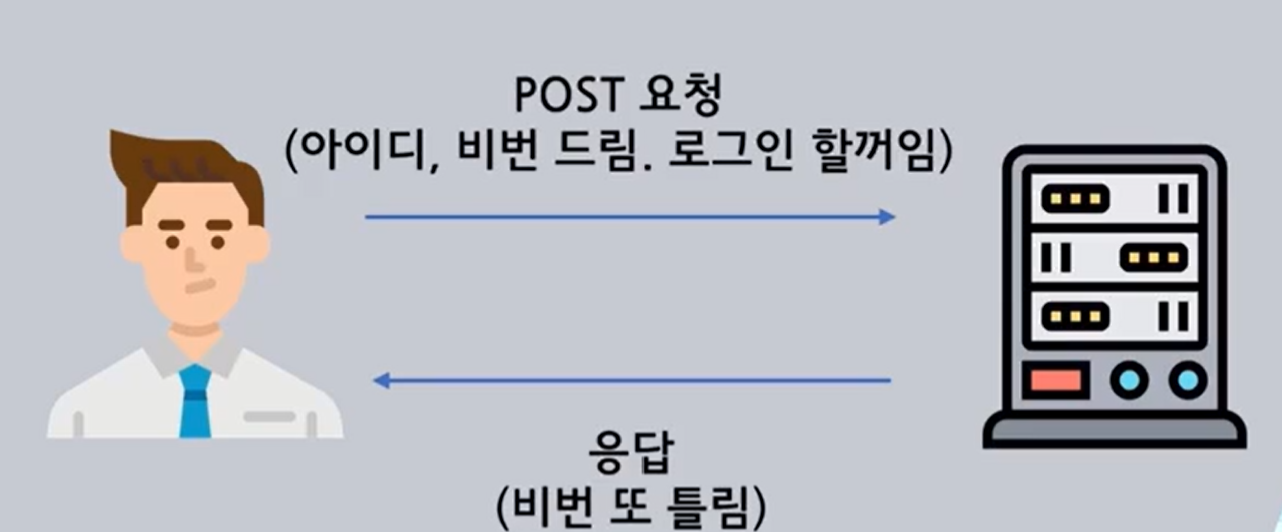

## 02-2 request에 관해서

In [1]:
!pip install requests
!pip install beautifulsoup4


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
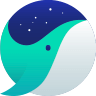
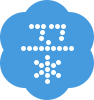

In [2]:
import requests

#저번 시간에도 말했지만, HTML 구조를 가져와주는 파이썬 코드는 request로 가능!

url = 'https://www.naver.com'
response = requests.get(url) #클라이언트인 우리가 서버에 요청하여 나온 응답(response)
html = response.text # 앞 시간에 확인했던 html 구조. 
print(html)

### 02-3 응답 결과

In [3]:
import requests as rq
url = 'https://www.naver.com'
response = rq.get(url)
print(response)

<Response [200]>


In [4]:
url = 'https://www.naver.com/a'
res = rq.get(url)
print(res)

<Response [404]>


여기서 __응답__이란?   

다시 말하자면, HTML 구조를 파이썬에 불러와야 하는데 이를 확인하는 방법으로 응답을 체크하는 방법이 있다.    
응답은 예시가 정말 많으니 제발 외우지 말고 인터넷을 찾아보자!!     
  물론 외워서 좋은 것들도 있으니 그건 외우자~~

## 1xx 조건부 응답  
100(계속): 요청자는 요청을 계속해야 한다. 서버는 이 코드를 제공하여 요청의 첫 번째 부분을 받았으며 나머지를 기다리고 있음을 나타낸다.  
101(프로토콜 전환): 요청자가 서버에 프로토콜 전환을 요청했으며 서버는 이를 승인하는 중이다.  
102(처리, RFC 2518)

## 2xx (성공)  
200(성공): 서버가 요청을 제대로 처리했다는 뜻이다. 이는 주로 서버가 요청한 페이지를 제공했다는 의미로 쓰인다.  
201(작성됨): 성공적으로 요청되었으며 서버가 새 리소스를 작성했다.  
202(허용됨): 서버가 요청을 접수했지만 아직 처리하지 않았다.  
203(신뢰할 수 없는 정보): 서버가 요청을 성공적으로 처리했지만 다른 소스에서 수신된 정보를 제공하고 있다.  
204(콘텐츠 없음): 서버가 요청을 성공적으로 처리했지만 콘텐츠를 제공하지 않는다.  
205(콘텐츠 재설정): 서버가 요청을 성공적으로 처리했지만 콘텐츠를 표시하지 않는다.   
206(일부 콘텐츠): 서버가 GET 요청의 일부만 성공적으로 처리했다.  
207(다중 상태, RFC 4918)  
208(이미 보고됨, RFC 5842)  
226 IM Used (RFC 3229)  

## 3xx (리다이렉션 완료)

300(여러 선택항목): 서버가 요청에 따라 여러 조치를 선택할 수 있다. 서버가 사용자 에이전트에 따라 수행할 작업을 선택하거나, 요청자가 선택할 수 있는 작업 목록을 제공한다.  
301(영구 이동): 요청한 페이지를 새 위치로 영구적으로 이동했다. GET 또는 HEAD 요청에 대한 응답으로 이 응답을 표시하면 요청자가 자동으로 새 위치로 전달된다.  
302(임시 이동): 현재 서버가 다른 위치의 페이지로 요청에 응답하고 있지만 요청자는 향후 요청 시 원래 위치를 계속 사용해야 한다.  
303(기타 위치 보기): 요청자가 다른 위치에 별도의 GET 요청을 하여 응답을 검색할 경우 서버는 이 코드를 표시한다. HEAD 요청 이외의 모든 요청을 다른 위치로 자동으로 전달한다.  
304(수정되지 않음): 마지막 요청 이후 요청한 페이지는 수정되지 않았다. 서버가 이 응답을 표시하면 페이지의 콘텐츠를 표시하지 않는다. 요청자가 마지막으로 페이지를 요청한 후 페이지가 변경되지 않으면 이 응답(If-Modified-Since HTTP 헤더라고 함)을 표시하도록 서버를 구성해야 한다.  
305(프록시 사용): 요청자는 프록시를 사용하여 요청한 페이지만 액세스할 수 있다. 서버가 이 응답을 표시하면 요청자가 사용할 프록시를 가리키는 것이기도 하다.  
307(임시 리다이렉션): 현재 서버가 다른 위치의 페이지로 요청에 응답하고 있지만 요청자는 향후 요청 시 원래 위치를 계속 사용해야 한다.  
308(영구 리다이렉션, RFC에서 실험적으로 승인됨)  

## 4xx (요청 오류)

400(잘못된 요청): 서버가 요청의 구문을 인식하지 못했다.  
401(권한 없음): 이 요청은 인증이 필요하다. 서버는 로그인이 필요한 페이지에 대해 이 요청을 제공할 수 있다. 상태 코드 이름이 권한 없음(Unauthorized)으로 되어 있지만 실제 뜻은 인증 안됨(Unauthenticated)에 더 가깝다.[2]  
402(결제 필요): 이 요청은 결제가 필요합니다.  
403(Forbidden, 금지됨): 서버가 요청을 거부하고 있다. 예를 들자면, 사용자가 리소스에 대한 필요 권한을 갖고 있지 않다. (401은 인증 실패, 403은 인가 실패라고 볼 수 있음)  
404(Not Found, 찾을 수 없음): 서버가 요청한 페이지(Resource)를 찾을 수 없다. 예를 들어 서버에 존재하지 않는 페이지에 대한 요청이 있을 경우 서버는 이 코드를 제공한다.  
405(허용되지 않는 메소드): 요청에 지정된 방법을 사용할 수 없다. 예를 들어 POST 방식으로 요청을 받는 서버에 GET 요청을 보내는 경우, 또는 읽기 전용 리소스에 PUT 요청을 보내는 경우에 이 코드를 제공한다.  
406(허용되지 않음): 요청한 페이지가 요청한 콘텐츠 특성으로 응답할 수 없다.  
407(프록시 인증 필요): 이 상태 코드는 401(권한 없음)과 비슷하지만 요청자가 프록시를 사용하여 인증해야 한다. 서버가 이 응답을 표시하면 요청자가 사용할 프록시를 가리키는 것이기도 한다.  
408(요청 시간초과): 서버의 요청 대기가 시간을 초과하였다.  
409(충돌): 서버가 요청을 수행하는 중에 충돌이 발생했다. 서버는 응답할 때 충돌에 대한 정보를 포함해야 한다. 서버는 PUT 요청과 충돌하는 PUT 요청에 대한 응답으로 이 코드를 요청 간 차이점 목록과 함께 표시해야 한다.  
410(사라짐): 서버는 요청한 리소스가 영구적으로 삭제되었을 때 이 응답을 표시한다. 404(찾을 수 없음) 코드와 비슷하며 이전에 있었지만 더 이상 존재하지 않는 리소스에 대해 404 대신 사용하기도 한다. 리소스가 영구적으로 이동된 경우 301을 사용하여 리소스의 새 위치를 지정해야 한다.  
411(길이 필요): 서버는 유효한 콘텐츠 길이 헤더 입력란 없이는 요청을 수락하지 않는다.  
412(사전조건 실패): 서버가 요청자가 요ㅡ청 시 부과한 사전조건을 만족하지 않는다.  
413(요청 속성이 너무 큼): 요청이 너무 커서 서버가 처리할 수 없다.  
414(요청 URI가 너무 긺): 요청 URI(일반적으로 URL)가 너무 길어 서버가 처리할 수 없다.  
415(지원되지 않는 미디어 유형): 요청이 요청한 페이지에서 지원하지 않는 형식으로 되어 있다.  
416(처리할 수 없는 요청범위): 요청이 페이지에서 처리할 수 없는 범위에 해당되는 경우 서버는 이 상태 코드를 표시한다.  
417(예상 실패): 서버는 Expect 요청 헤더 입력란의 요구사항을 만족할 수 없다.  
418(I'm a teapot, RFC 2324 ,https://google.com/teapot)  
420(Enhance Your Calm, 트위터)  
422(처리할 수 없는 엔티티, WebDAV; RFC 4918)  
423(잠김,WebDAV; RFC 4918): 접근하려는 리소스가 잠겨 있다.  
424(실패된 의존성, WebDAV; RFC 4918)  
424(메쏘드 실패, WebDAV)  
425(정렬되지 않은 컬렉션, 인터넷 초안)  
426(업그레이드 필요, RFC 2817): 클라이언트는 업그레이드 헤더 필드에 주어진 프로토콜로 요청을 보내야 한다.  
428(전제조건 필요, RFC 6585)  
429(너무 많은 요청, RFC 6585): 사용자가 일정 시간 동안 너무 많은 요청을 보냈다.  
431(요청 헤더 필드가 너무 큼, RFC 6585)  
444(응답 없음, Nginx)  
449(다시 시도, 마이크로소프트)  
450(윈도 자녀 보호에 의해 차단됨, 마이크로소프트)  
451(법적인 이유로 이용 불가, 인터넷 초안)  
451(리다이렉션, 마이크로소프트)  
494(요청 헤더가 너무 큼, Nginx)  
495(Cert 오류, Nginx)  
496(Cert 없음, Nginx)  
497(HTTP to HTTPS, Nginx)  
499(클라이언트가 요청을 닫음, Nginx)  

## 5xx (서버 오류)
500(내부 서버 오류): 서버에 오류가 발생하여 요청을 수행할 수 없다.  
501(구현되지 않음): 서버에 요청을 수행할 수 있는 기능이 없다. 예를 들어 서버가 요청 메소드를 인식하지 못할 때 이 코드를 표시한다.  
502 (Bad Gateway, 불량 게이트웨이): 서버가 게이트웨이나 프록시 역할을 하고 있거나 또는 업스트림 서버에서 잘못된 응답을 받았다.  
503(서비스를 사용할 수 없음): 서버가 오버로드되었거나 유지관리를 위해 다운되었기 때문에 현재 서버를 사용할 수 없다. 이는 대개 일시적인 상태이다.  
504(게이트웨이 시간초과): 서버가 게이트웨이나 프록시 역할을 하고 있거나 또는 업스트림 서버에서 제때 요청을 받지 못했다.  
505(HTTP 버전이 지원되지 않음): 서버가 요청에 사용된 HTTP 프로토콜 버전을 지원하지 않는다.  
506(Variant Also Negotiates, RFC 2295)  
507(용량 부족, WebDAV; RFC 4918)  
508(루프 감지됨, WebDAV; RFC 5842)  
509(대역폭 제한 초과, Apache bw/limited extension)  
510(확장되지 않음, RFC 2774)  
511(네트워크 인증 필요, RFC 6585)  
520(Unknown Error, 알 수 없음)  
598(네트워크 읽기 시간초과 오류, 알 수 없음)  
599(네트워크 연결 시간초과 오류, 알 수 없음)  


## 자주 나타나는 코드


1. 200 : 요청 처리 성공

2. 400 : 서버가 요청한 구문을 인식하지 못함

3. 404(Not Found) : 서버가 요청한 페이지 찾지 못함

__웹과 컴퓨터를 request로 연결했으면, 이제는 html을 파이썬으로 불러오고, html을 분해하는 시간을 가져야겠죠?__

## 02-4 BeautifulSoup(아름다운 스푼)

__위에서 HTML을 파이썬 코드로 가져왔고, 그 파이썬 코드를 태그별로 분해하는 작업을 BeautifulSoup으로 거쳐 크롤링을 하시면 됩니다~~__

#### 02-4-1 find로 내가 원하는 단어 가져오기

In [22]:
from bs4 import BeautifulSoup

html_str = "<html><div>hello</div></html>"
bs_obj = BeautifulSoup(html_str, 'html.parser')

print(type(bs_obj))
print(bs_obj)
print(bs_obj.find("div")) #알아야 할 사실은 <div> 랑 </div> 를 양 끝으로 파일을 가져온다는 사실!

<class 'bs4.BeautifulSoup'>
<html><div>hello</div></html>
<div>hello</div>


In [30]:
html_str = """
<html>
    <body>
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
    </body>
</html>
"""

bs_obj = BeautifulSoup(html_str, 'html.parser')

ul = bs_obj.find('ul')
print(ul)

<ul>
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>


여기서 hello만 뽑으려면 어떻게 할까요?

In [7]:
html_str = """
<html>
    <body>
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
    </body>
</html>
"""

bs_obj = BeautifulSoup(html_str, 'html.parser')

ul = bs_obj.find('ul')
li = ul.find('li')

print(li)
print(li.text) #태그 안의 단어만 가져올때 사용하는 text~

<li>hello</li>
hello


그러면 이번에는 hello 말고 bye나 welcome을 뽑으려면 어떻게 할까요? 아까처럼 find를 두번이나 쓰면서 해야 될까요? __아닙니다!(진지)__

In [8]:
html_str = """
<html>
    <body>
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
    </body>
</html>
"""

bs_obj = BeautifulSoup(html_str, 'html.parser')

ul = bs_obj.find('ul')
lis=ul.findAll('li')
print(lis)
print("----------------------")
print(lis[1].text)

[<li>hello</li>, <li>bye</li>, <li>welcome</li>]
----------------------
bye


#### 02-4-2 class 속성을 이용해서 내가 원하는 단어 긁어오기

In [9]:
html_str = """
<html>
    <body>
        <ul class ="greet">
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
        <ul class="reply">
            <li>ok</li>
            <li>no</li>
            <li>sure</li>
        </ul>
    </body>
</html>
"""

bs_obj = BeautifulSoup(html_str, 'html.parser')

ul = bs_obj.find('ul')
print(ul)

<ul class="greet">
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>


Q. 여기서 밑에 있는 no나 sure은 어떻게 가져오면 될까요?? 또 findall을 써서 모든 list를 가져오고 하기에는 바보  
A. 이번에는 위의 예시와는 다르게 class가 있다는거! class를 잘 이용하시면 될 듯합니다.

In [10]:
html_str = """
<html>
    <body>
        <ul class ="greet">
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
        <ul class="reply">
            <li>ok</li>
            <li>no</li>
            <li>sure</li>
        </ul>
    </body>
</html>
"""

bs_obj = BeautifulSoup(html_str, 'html.parser')

ul = bs_obj.find('ul', {'class':'reply'})
print(ul)
print('---------------------')
lis = ul.findAll('li')
print(lis[2].text)


<ul class="reply">
<li>ok</li>
<li>no</li>
<li>sure</li>
</ul>
---------------------
sure


#### 02-4-3 속성값으로 뽑아내기

In [33]:
html_str="""
<html>
    <body>
        <ul class="ko">
            <li>
                <a href = "https://www.naver.com/">네이버</a>
            </li>
            <li>
                <a href = "https://www.daum.net/">다음</a>
            </li>
            
        </ul>
        <ul class = "sns">
            <li>
                <a href = "https://www.google.com/">구글</a>
            </li>
            <li>
                <a href = "https://www.facebook.com/">페이스북</a>
            </li>
        </ul>
    </body>
</html>
"""

bs_obj = BeautifulSoup(html_str, 'html.parser')
atag = bs_obj.find("a")
print(atag)

print("--------------")

print(atag['href'])
print(atag.text)

<a href="https://www.naver.com/">네이버</a>
--------------
https://www.naver.com/
네이버


## 네이버 홈페이지 실습 코드

<class 'bs4.BeautifulSoup'>

<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨
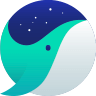
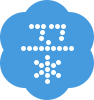

In [12]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://www.naver.com'
response = rq.get(url) #클라이언트인 우리가 서버에 요청하여 나온 응답(response), naver 서버에 대화를 시도함. 
html = response.text # 앞 시간에 확인했던 html 구조.
soup = BeautifulSoup(html, 'html.parser') #html.parser를 이용하여 html을 파이썬 코드로 변환.
print(type(soup))
print(soup)


## <네이버 메뉴 이름 뽑아내기>

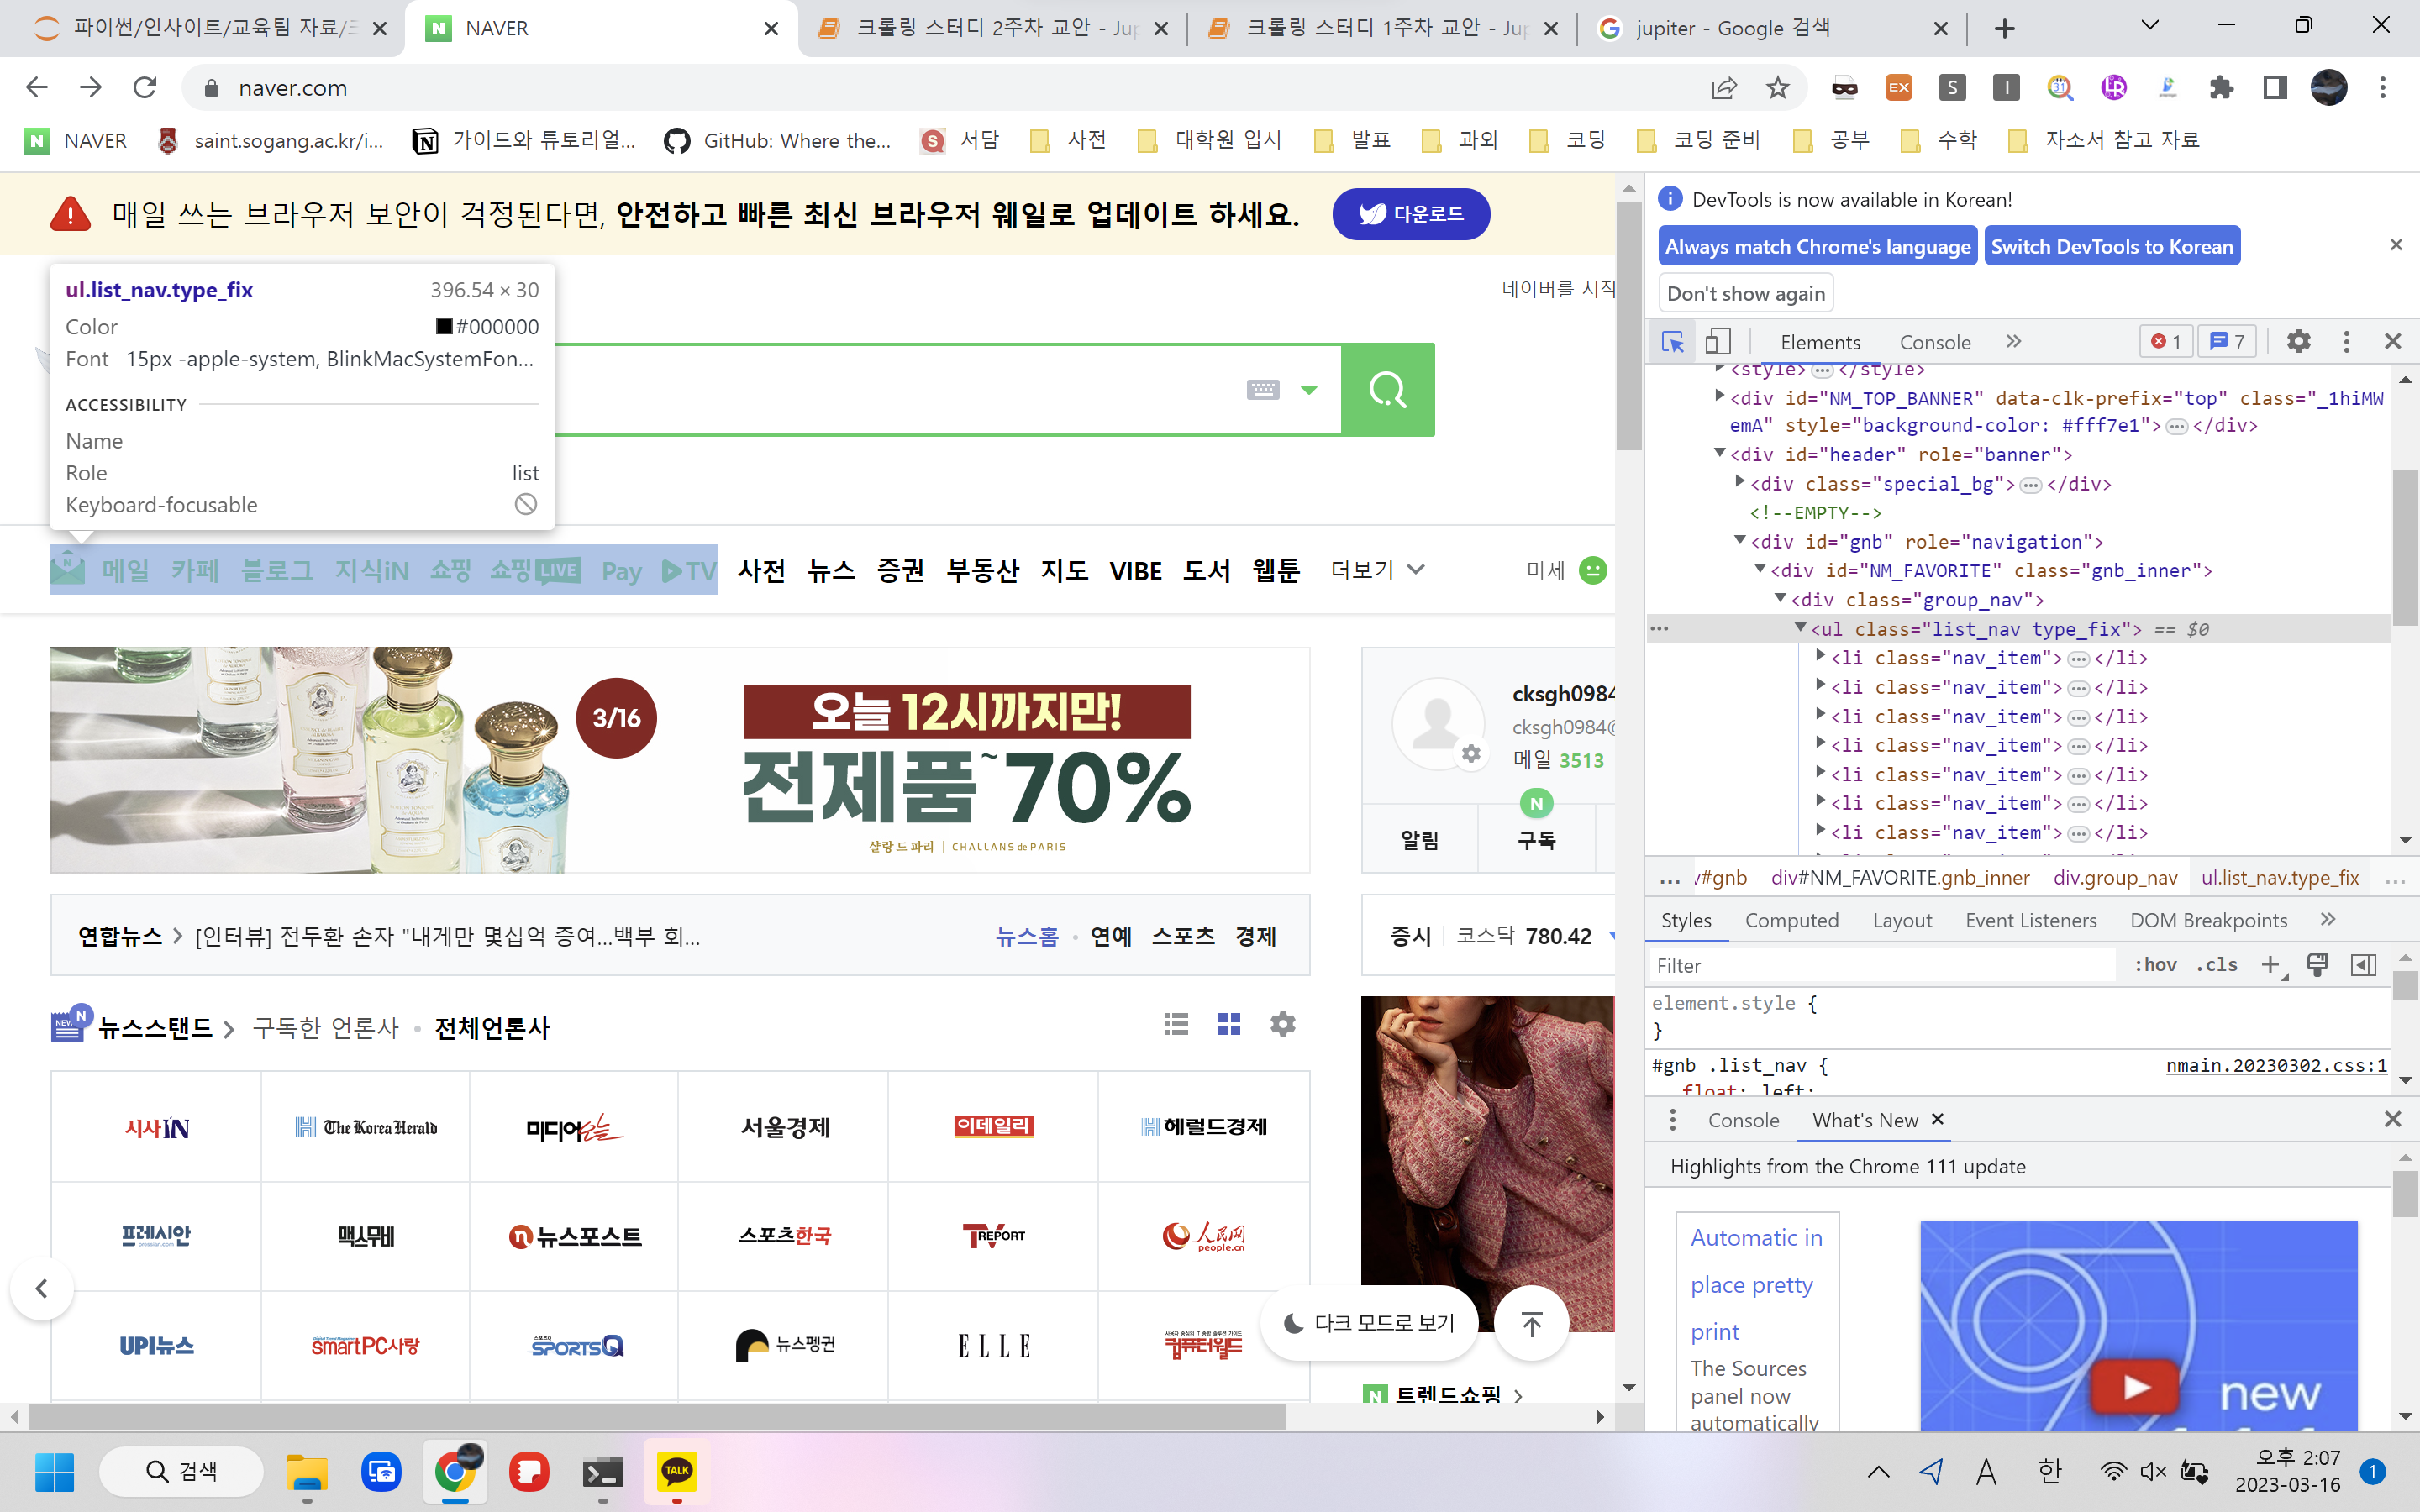

In [13]:
import pandas as pd

url = 'https://www.naver.com'
response = rq.get(url) #클라이언트인 우리가 서버에 요청하여 나온 응답(response), naver 서버에 대화를 시도함. 
html = response.text # 앞 시간에 확인했던 html 구조.
soup = BeautifulSoup(html, 'html.parser')

ul = soup.find("ul",{'class':'list_nav type_fix'})
al=ul.findAll('a')
Data=[i.text for i in al] 
data=pd.DataFrame(Data)
display(data)

0
0      메일
1      카페
2     블로그
3    지식iN
4      쇼핑
5  쇼핑LIVE
6     Pay
7      TV

## <네이버를 시작페이지로> 긁어오기

In [35]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://www.naver.com'
response = rq.get(url) #클라이언트인 우리가 서버에 요청하여 나온 응답(response), naver 서버에 대화를 시도함. 
html = response.text # 앞 시간에 확인했던 html 구조.
soup = BeautifulSoup(html, 'html.parser') #html.parser를 이용하여 html을 파이썬 코드로 변환.
word = soup.select_one("#NM_set_home_btn") #'네이버를 시작페이지로' 의 id를 가져옴. 단 id를 가져올 때, # 붙여서 가져와야 함.  
print(word)

print(word['href']) #우리가 원하는 '네이버를 시작페이지'로 라는 단어만 가져오려면

<a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>
https://help.naver.com/support/welcomePage/guide.help


## 상세 페이지 링크 뽑아내기

## 실습 - 기사의 제목과 링크 크롤링

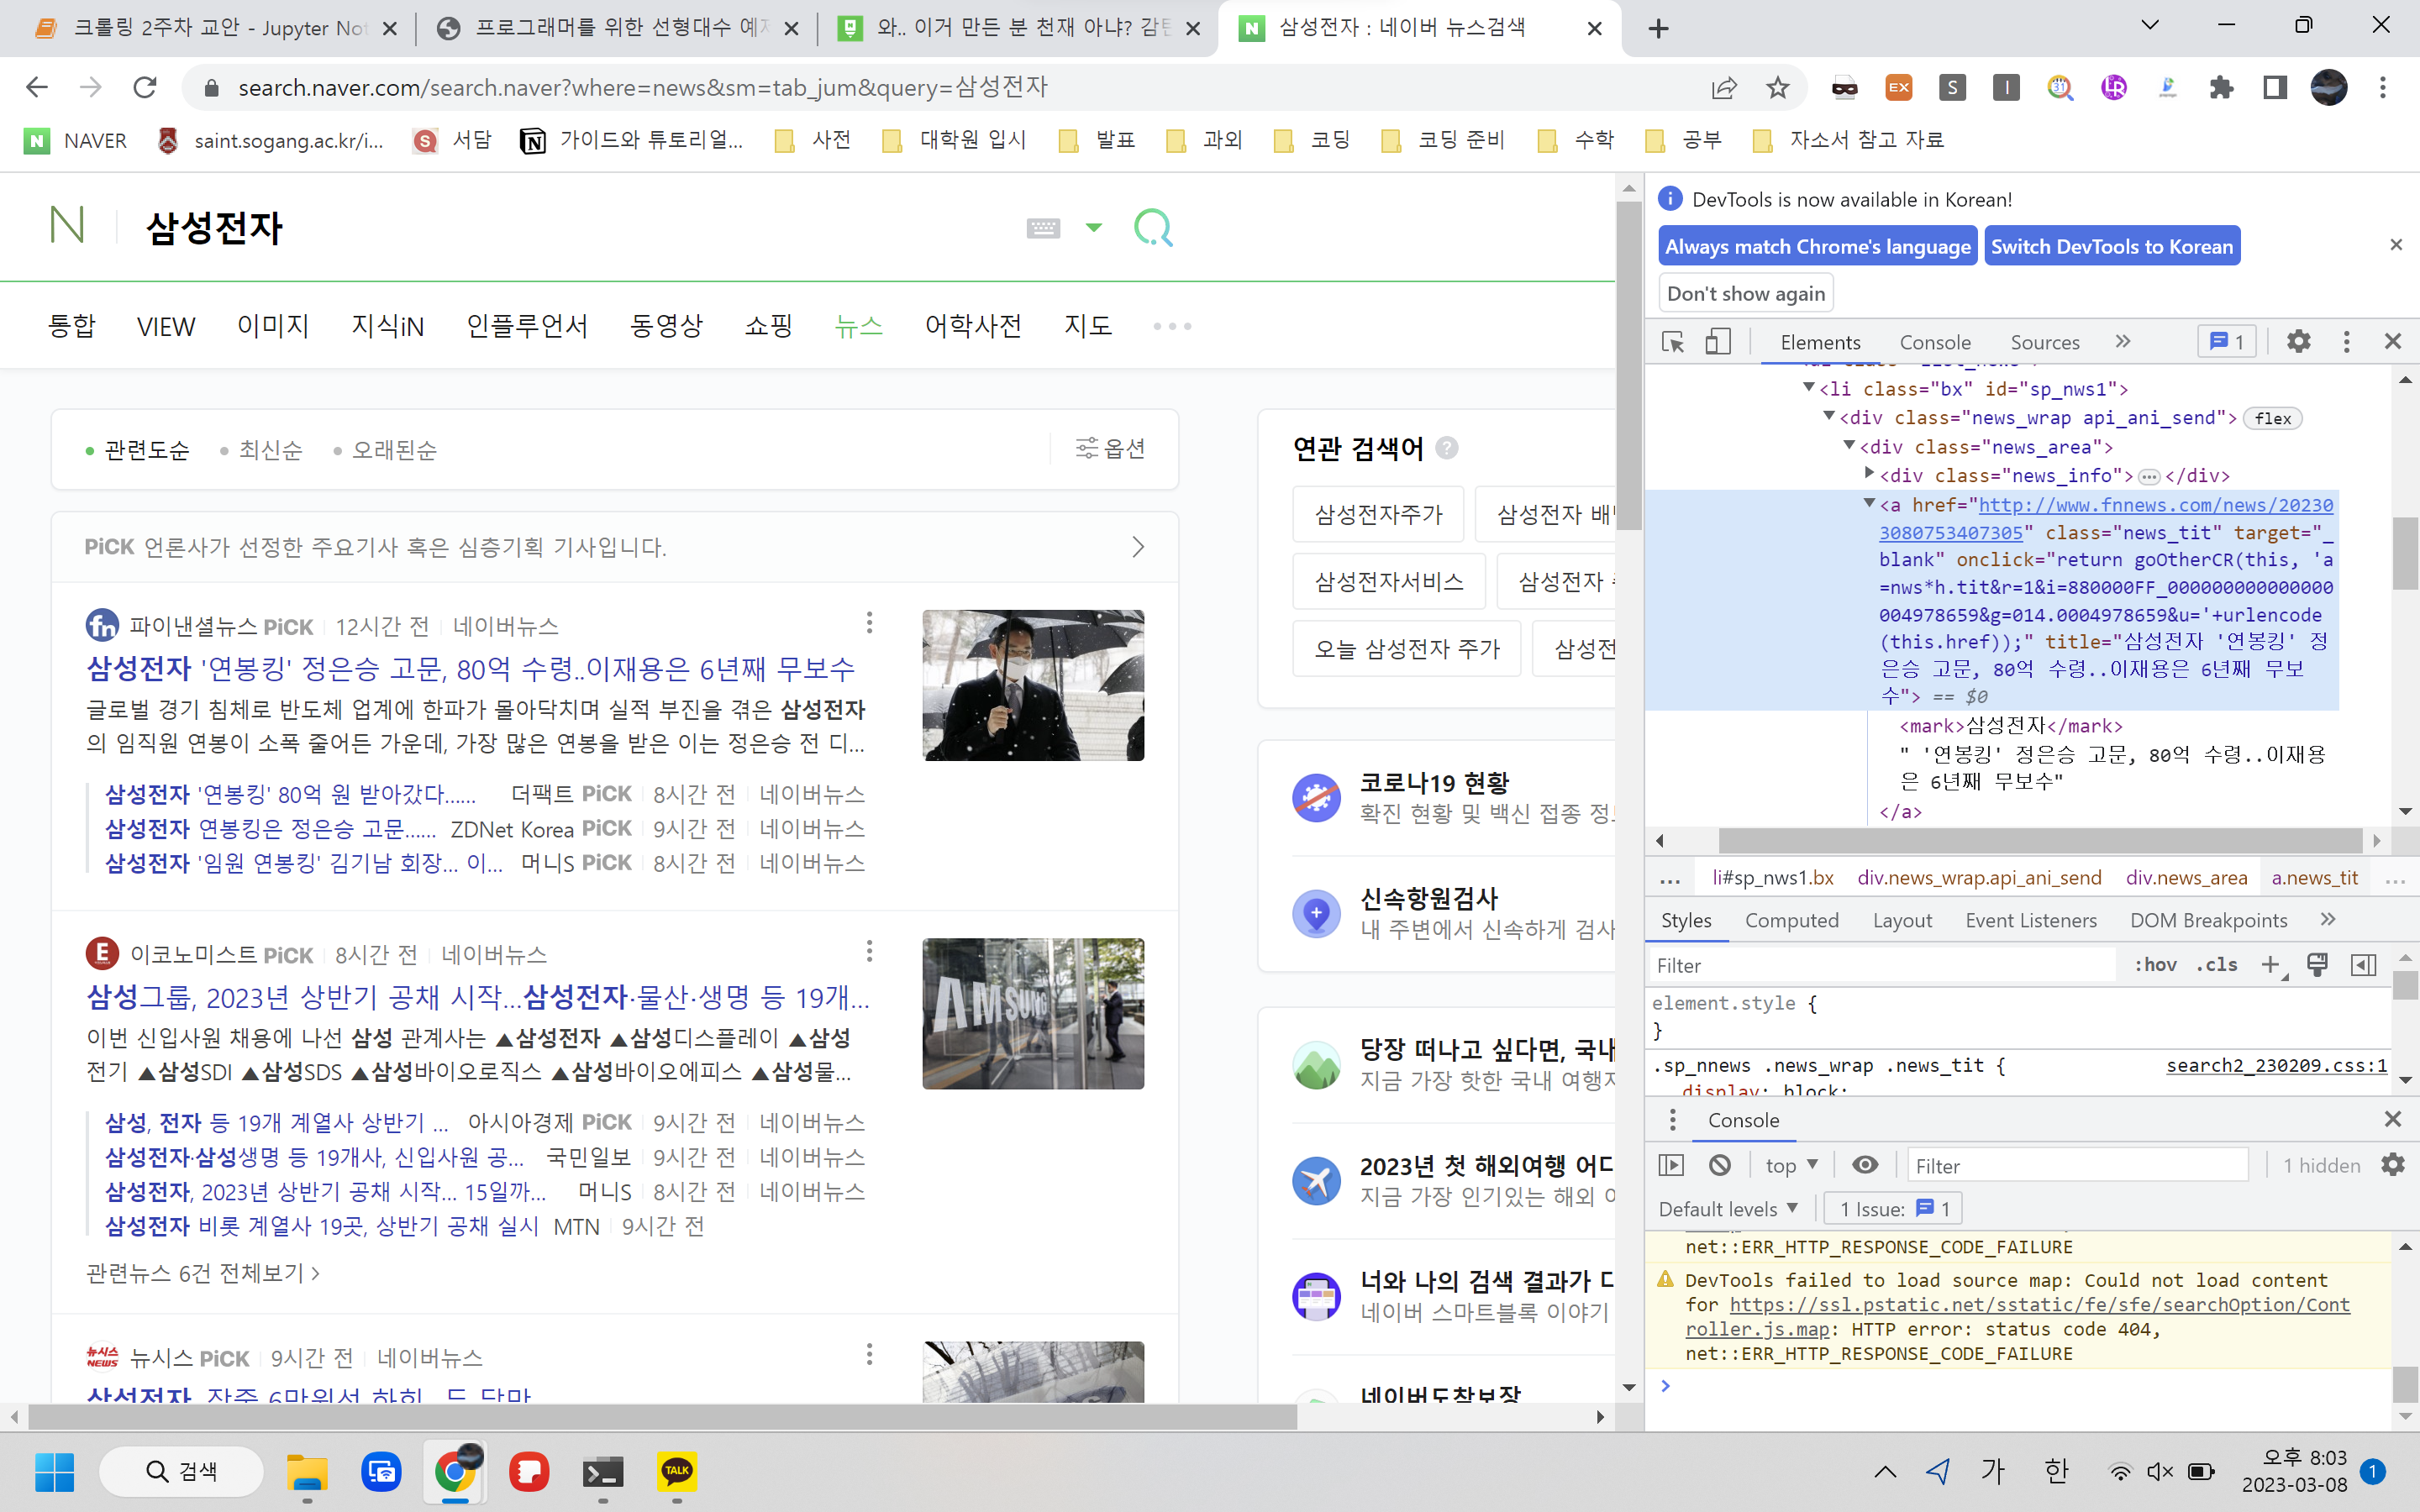

제 인생 회사인 삼성전자의 제목과 링크 크롤링을 request와 bs4를 사용하여 해볼게요~ 먼저 네이버에서 '삼성전자'를 치고 F12를 눌러, 웹의 HTML을 읽고, 가져오고 싶은 뉴스 기사 제목을 누릅니다. 그러면 그림에서도 볼 수 있듯이, href 옆의 링크와 title 옆의 제목을 알 수 있습니다.   

그리고 바로 Ctrl + F 기능을 이용하여 크롤링하려고 하는 class의 news_tit를 검색하여 한 페이지에 기사가 몇 개 나와있는지, 그에 맞는 것을 찾아봅시다. 

저번 시간에 class와 id를 통해서 크롤링을 진행한다고 하였는데, 여기서 추가적으로 알아야 할 사실은 class는 앞에 .(dot)이 붙고, id 는 #이 붙는다는 사실을 까먹지 마시고 진행해주세요!

In [1]:
import requests
from bs4 import BeautifulSoup

url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90'
response = requests.get(url)

html = response.text
soup = BeautifulSoup(html,'html.parser')

links = soup.select('.news_tit') #결과가 리스트로 나오는 것을 알게 됨.

print(links)

[<a class="news_tit" href="http://www.newsis.com/view/?id=NISX20230508_0002293969&amp;cID=13001&amp;pID=13000" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=1&amp;i=88000127_000000000000000011845177&amp;g=003.0011845177&amp;u='+urlencode(this.href));" target="_blank" title='삼성전기 4.1% 임금인상 유력, "올해도 삼성전자가 기준"'><mark>삼성</mark>전기 4.1% 임금인상 유력, "올해도 <mark>삼성전자</mark>가 기준"</a>, <a class="news_tit" href="https://www.munhwa.com/news/view.html?no=2023050701039910175002" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=4&amp;i=880000C4_000000000000000002570404&amp;g=021.0002570404&amp;u='+urlencode(this.href));" target="_blank" title="삼성전자 파운드리, 출범 5년만에 매출 200억 달러 돌파"><mark>삼성전자</mark> 파운드리, 출범 5년만에 매출 200억 달러 돌파</a>, <a class="news_tit" href="https://www.psnews.co.kr/news/articleView.html?idxno=2024285" onclick="return goOtherCR(this, 'a=nws*f.tit&amp;r=9&amp;i=88188590_000000000000000000052389&amp;g=5669.0000052389&amp;u='+urlencode(this.href));" target="_blank" title="[PS 산업] 삼성전자, LG전

In [16]:
for link in links:
    title = link.text # 태그 안에 텍스트 요소를 들고 온다. 
    url = link.attrs['href'] # href의 속성값을 가져온다.
    print(title, url)

삼성전자 양방향 참여 수업 위한 '전자칠판' 신제품 공개 http://www.newsis.com/view/?id=NISX20230329_0002245273&cID=13001&pID=13000
삼성전자, 美 환경청 주관 ‘에너지스타상’ 수상 https://economist.co.kr/article/view/ecn202303290008
"전자칠판으로 학생들과 판서 공유"…삼성, 유럽 교육시장 눈독 http://www.fnnews.com/news/202303291000410369
지난해 채용 가장 많이 한 회사 봤더니…삼성전자 1위 https://www.munhwa.com/news/view.html?no=2023032801039907025001
삼성전자, 세계 최대 교육전시회서 전자칠판 선보여 https://www.yna.co.kr/view/AKR20230329031300003?input=1195m
삼성전자, 美정부 '에너지스타상' 2관왕 https://www.nocutnews.co.kr/news/5917830
지스트 창업기업 2곳, 삼성전자 '혁신 스타트업'에 선정 https://www.yna.co.kr/view/AKR20230329081700054?input=1195m
삼성전자 베트남 하청노동자 '메탄올' 중독 사망... "7년 전 한국과 똑같아" https://www.ohmynews.com/NWS_Web/View/at_pg.aspx?CNTN_CD=A0002914219&CMPT_CD=P0010&utm_source=naver&utm_medium=newsearch&utm_campaign=naver_news
삼성전자, 세계 최대 교육전시회서 2023년형 전자칠판 신제품 공개 http://www.edaily.co.kr/news/newspath.asp?newsid=02138566635548240
삼성전자 베트남 2차 협력사 납품사기 당했는데…시민단체는 '삼성 탓' https://www.dailian.co.kr/news/view/1217151/?sc=Naver


## 한 페이지만이 아닌 여러 페이지를 크롤링 하는 법

위의 방법과 비슷한 방법으로 진행하는데, 페이지를 넘길 때마다 주소 간의 차이를 찾아 적용만 해주시면 됩니다. 

예를 들어서,   
삼성전자 1페이지의 주소는 https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=199&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=1 이다.  
그리고 2페이지의 주소는 https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=237&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=11 이다.

여기서의 차이점을 보면 마지막에 start 값이 10씩 증가한다는 사실을 알 수 있다.(첫째항이 1이고, 공차가 10인 등차수열)  
페이지를 넘기다 보면 점점 값이 커지고 이를 규칙으로 잡고 하면 된다. 

In [17]:
a=list(range(1,71,10))
a

[1, 11, 21, 31, 41, 51, 61]

In [18]:
for i in range(1,32,10):
    url = '''https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90&sort=0&photo=0&field=0&pd=0&ds=&de=
    &cluster_rank=199&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='''+str(i)
    response = requests.get(url)

    html = response.text
    soup = BeautifulSoup(html,'html.parser')

    links = soup.select('.news_tit') #결과가 리스트로 나오는 것을 알게 됨.
    for link in links:
        title = link.text # 태그 안에 텍스트 요소를 들고 온다. 
        url = link.attrs['href'] # href의 속성값을 가져온다.
        print(title, url)
        

삼성전자, 미국 환경청 '에너지스타상' 최고상 '2관왕' http://www.newsis.com/view/?id=NISX20230329_0002244809&cID=13001&pID=13000
"전자칠판으로 학생들과 판서 공유"…삼성, 유럽 교육시장 눈독 http://www.fnnews.com/news/202303291000410369
지난해 채용 가장 많이 한 회사 봤더니…삼성전자 1위 https://www.munhwa.com/news/view.html?no=2023032801039907025001
삼성전자, 세계 최대 교육전시회서 전자칠판 공개 https://www.yna.co.kr/view/PYH20230329058400003?input=1196m
삼성전자, 美정부 '에너지스타상' 2관왕 https://www.nocutnews.co.kr/news/5917830
삼성전자, 세계 최대 교육전시회서 전자칠판 신제품 공개 https://biz.chosun.com/it-science/ict/2023/03/29/55N3WTEVC5H5LEJ6UV4SDB5MGE/?utm_source=naver&utm_medium=original&utm_campaign=biz
지스트 창업기업 2곳, 삼성전자 '혁신 스타트업'에 선정 https://www.yna.co.kr/view/AKR20230329081700054?input=1195m
삼성전자 베트남 하청노동자 '메탄올' 중독 사망... "7년 전 한국과 똑같아" https://www.ohmynews.com/NWS_Web/View/at_pg.aspx?CNTN_CD=A0002914219&CMPT_CD=P0010&utm_source=naver&utm_medium=newsearch&utm_campaign=naver_news
삼성전자, 세계 최대 교육전시회서 2023년형 전자칠판 신제품 공개 http://www.edaily.co.kr/news/newspath.asp?newsid=02138566635548240
삼성전자 베트남 2차 협력사 납품

In [19]:
import pandas as pd
df = pd.DataFrame([['b','a']])
df.columns = ['기사 제목', '주소']

display(df)


기사 제목 주소
0     b  a

In [20]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
df = pd.DataFrame([['b','a']])
df.columns = ['기사제목', '주소']
j=1
for i in range(1,100):
    try :
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=199&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start='+str(j)
        response = requests.get(url)

        html = response.text
        soup = BeautifulSoup(html,'html.parser')

        links = soup.select('.news_tit') #결과가 리스트로 나오는 것을 알게 됨.
        for link in links:
            title = link.text # 태그 안에 텍스트 요소를 들고 온다. 
            url = link.attrs['href'] # href의 속성값을 가져온다.
            df.loc[i, '기사제목'] = title; df.loc[i,'주소'] = url
        j=j+10
    except:
        pass
df.drop(0, axis=0, inplace=True)
display(df)


기사제목  \
1        삼성전자 베트남 2차 협력사 납품사기 당했는데…시민단체는 '삼성 탓'   
2   하나마이크론 주가 초강세 왜?..삼성전자 설비 임대 소식에 [오늘, 이 종목]   
3              '반도체 인재+지방 발전' 삼성전자 '두마리 토끼' 잡는다   
4                  삼성전자, AI 솔루션 학회 ‘멤콘 2023’ 참여   
5    삼성전자, 유럽 최대 교육전시회 Bett서 2023년형 전자칠판 신제품 공개   
..                                          ...   
94            삼성전자, 갤럭시 북3 시리즈 대박…전작 보다 2.5배 판매   
95         삼성전자, 반도체 업계 최초 '카본트러스트·AWS' 국제인증 획득   
96           진화한 ‘비스포크’…삼성전자, 고효율‧친환경에 초연결성 더했다   
97             삼성전자 `국제수자원관리동맹` 최고 등급 `플래티넘` 인증   
99          삼성전자가 콕 찝은 18억대 규모 미래 시장, 신제품으로 잡는다   

                                                   주소  
1   https://www.dailian.co.kr/news/view/1217151/?s...  
2               https://www.mk.co.kr/article/10698902  
3       http://www.fnnews.com/news/202303271352443796  
4   http://news.heraldcorp.com/view.php?ud=2023032...  
5   http://www.worktoday.co.kr/news/articleView.ht...  
..                                                ...  
94  https://www.dnews.co.kr/uhtml/view.jsp?idxno=2...  
95              https://www.etnews.com/20230322000152  
96  https://economist.co.kr/article/view/ecn202303...  
97  http://www.dt.co.kr/contents.html?article_no=2...  
99  http://news.mt.co.kr/mtview.php?no=20230321091...  

[98 rows x 2 columns]

## 과제

1. 복습
2. 좋아하는 글 or 나무위키 긁어서 크롤링 해오기 (Github 제출 필요)